# Plots

This file demonstrates how to create plots in Julia by using the Plots package (using PyPlot and GR as the backends).

See https://juliaplots.github.io/ for the documentation.

Notice: Restart Julia before running this file (at least if you have used another plotting package)

In [1]:
using Dates             

In [3]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(500,333))
else    
    gr(size=(480,320))
    default(fmt = :svg)     #uglier, but creates a smaller notebook file   
end

#run this cell twice to overcome a current (6 Sep 2018) limitation of the Plots package

# A First Plot

The next cell creates and shows a first plot.

The first plot takes a bit of time. Subsequent plots are much quicker.

The $x$ and $y$ values in this file are in vectors and matrices, so all the examples can be applied to (statistical) data. (In contrast, when your aim is to plot functions, then you can actually avoid generating the y values. See the manual for a discussion.)

The `savefig()` command in the third cell saves the plot to a graphics file.

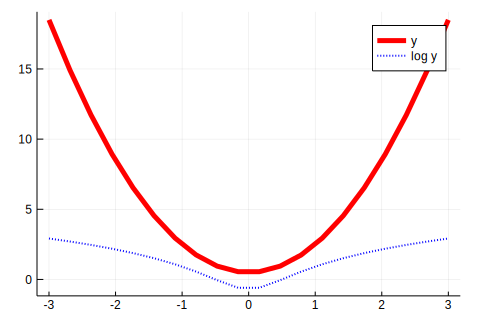

In [4]:
x = range(-3,stop=3,length=20)  #0.7 syntax, create some "data" to plot
y = 2*x.^2 .+ 0.5

p1 = plot(x,y,label="y",color=:red,linewidth=5)
plot!(x,log.(y),label="log y",color=:blue,line=(:dot,2))

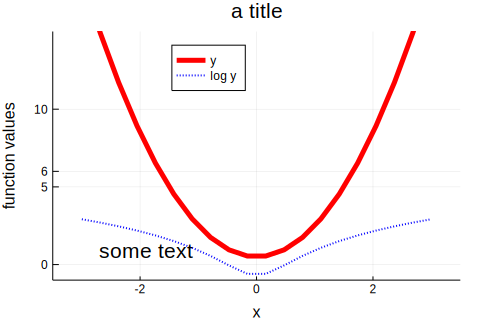

In [5]:
#now with title, labels and more

p1 = plot(x,y,label="y",color=:red,linewidth=5,xticks=[-2;0;2],yticks=[0;5;6;10])
plot!(x,log.(y),label="log y",color=:blue,line=(:dot,2))
plot!(xlims=(-3.5,3.5),ylims=(-1,15),legend=:top)
title!("a title")
xlabel!("x")
ylabel!("function values")
annotate!(-1.9,0.9,"some text")

In [6]:
savefig("AFirstPlot.pdf")              #change to .svg to get an svg file

## The First Plot Revisited

using more compact syntax

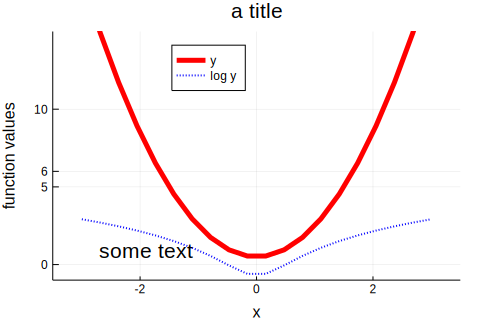

In [7]:
p1 = plot(x,[y log.(y)],label=["y" "log y"],color=[:red :blue],line=[:solid :dot],linewidth=[5 2],
     title="a title",xlabel="x",ylabel="function values",legend=:top,
     xlims=(-3.5,3.5),ylims=(-1,15),xticks=[-2;0;2],yticks=[0;5;6;10])
annotate!(-1.9,0.9,"some text")

# Subplots

Subplots are easy. To make a 2x2 plot, first define the four individual plots as in ```p11 = plot(x,y,...), p12 = ...``` and then put them together by ```plot(p11,p12,p21,p22,layout=(2,2))```

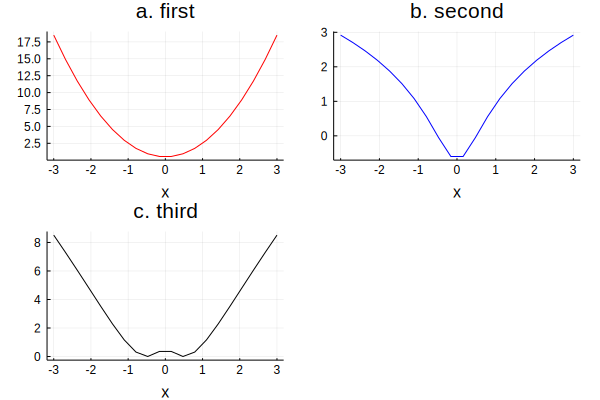

In [8]:
p11 = plot(x,y,title="a. first",legend=false,color=:red)             #create subplot [1,1]
p12 = plot(x,log.(y),title="b. second",legend=false,color=:blue)     #create subplot [1,2]
p21 = plot(x,log.(y).^2,title="c. third",legend=false,color=:black)  #create subplot [2,1]
p22 = plot(legend=false,grid=false,foreground_color_subplot=:white)  #create subplot [2,2] to be blank

p1 = plot(p11,p12,p21,p22,layout=(2,2),size=(600,400))                  #set up subplots    
xlabel!("x")

The next cell is a more concise version. 

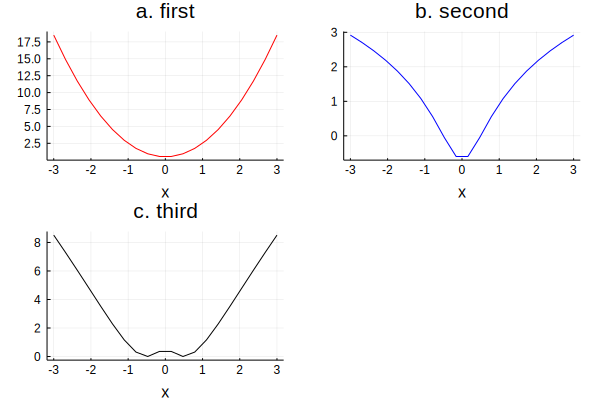

In [9]:
p1 = plot(x,[y log.(y) log.(y).^2],layout=(2,2),legend=false,size=(600,400),
         color=[:red :blue :black],title = ["a. first" "b. second" "c. third"],xlabel = "x")                  
plot!(p1[2,2],legend=false,grid=false,foreground_color_subplot=:white)      #modify subplot [2,2] to be blank

# Adding Horizontal and Vertical Lines

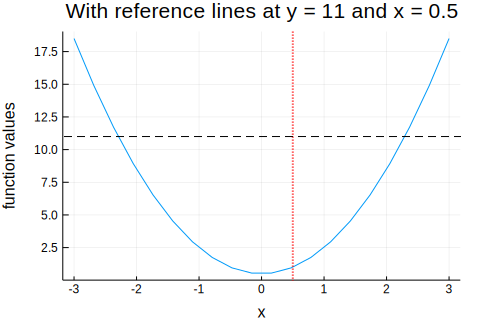

In [10]:
p1 = plot(x,y,legend=false)
title!("With reference lines at y = 11 and x = 0.5")
xlabel!("x")
ylabel!("function values")
plot!([0.5],linetype=:vline,linecolor=:red,line=(:dot,2))
plot!([11],linetype=:hline,linecolor=:black,line=(:dash,1))

# LaTeX in the Figure

The LaTeX might look ugly in this notebook, but typically much better after saving, for instance, by savefig("ASecondPlot.pdf").

Notice: you probably need LaTeX installed on the computer for this run. Also, you may be asked to install some further LaTeX packages and fonts.

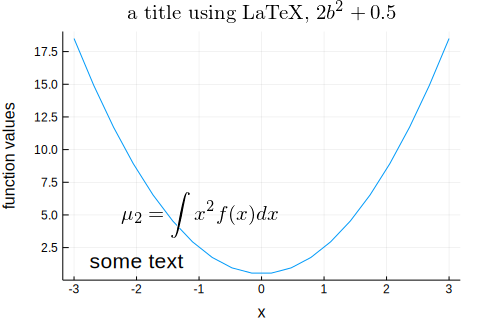

In [11]:
using LaTeXStrings                 #add some LaTeX to the figure

p1 = plot(x,y,legend=false)
title!(L"$\mathrm{a \ title \ using \ LaTeX,\ } 2 b^2 + 0.5$")
xlabel!("x")
ylabel!("function values")
annotate!(-2.0,1.5,"some text")
annotate!(-1.0,5,L"$\mu_2 = \int x^2 f(x) dx$")

In [12]:
savefig("ASecondPlot.pdf")      #looks better when saved to pdf
                                #with GR the file is large; pyplot gives a smaller file

# Bars and Stairs Plots

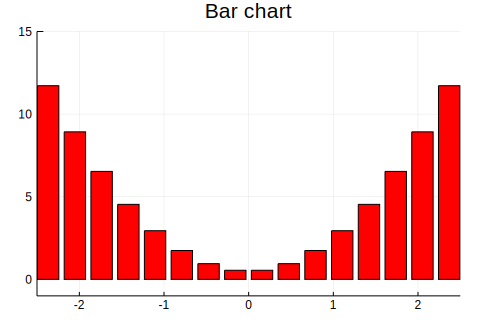

In [13]:
p1 = bar(x,y,legend=false,color=:red,xlims=(-2.5,2.5),ylims=(-1,15))
title!("Bar chart")

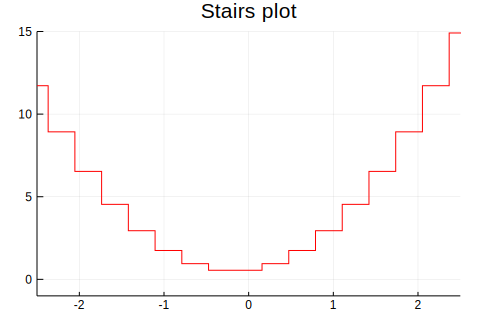

In [14]:
p1 = plot(x,y,linetype=:steppre,legend=false,color=:red,xlims=(-2.5,2.5),ylims=(-1,15))
title!("Stairs plot")

# Surface Plot

In case the surface plot (below) does not work, switch over to ```pyplot(size=(500,333))``` and then try again. (This seems to be an issue on some Julia versions/some operating systems.) 

(20,)(25,)(20, 25)


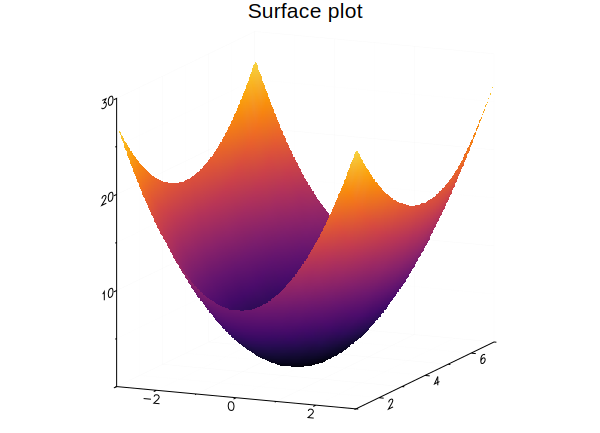

In [15]:
x = range(-3,stop=3,length=20)   #0.7 syntax, create some "data" to plot
y = range(1,stop=7,length=25)

z = fill(NaN,(length(x),length(y)))  #to put results in, initialized as NaNs
for j = 1:length(y)                   #create z2 column by column
  z[:,j] = 2*x.^2 .+ (y[j]-4)^2 - 0.0*x.*(y[j]-4)
end

#notice the arguments: x,y,copy(z'). Use vec(x),vec(y), copy(z') to be safe on 0.7       
println(size(x),size(y),size(z))

#`pyplot(size=(500,333))                   #in case surface does not work with gr()
p1 = surface(vec(x),vec(y),copy(z'),legend=false,xlims=(-3,3),ylims=(1,7),zlims=(0,30),size=(600,433))
title!("Surface plot")

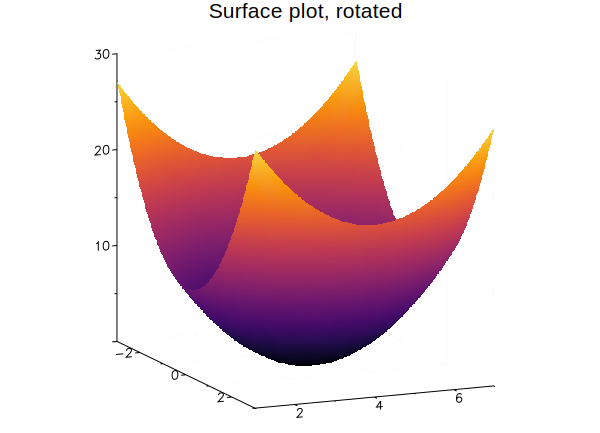

In [16]:
p1 = surface(vec(x),vec(y),copy(z'),legend=false,xlims=(-3,3),ylims=(1,7),zlims=(0,30),size=(600,433),camera=(60,30))
title!("Surface plot, rotated")

# Contour Plot

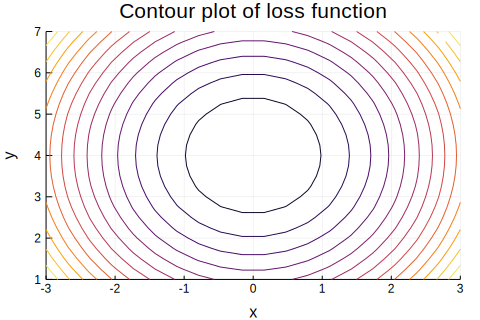

In [17]:
p1 = contour(vec(x),vec(y),copy(z'),legend=false)         #notice the transpose: z'
title!("Contour plot of loss function")
xlabel!("x")
ylabel!("y")

# Scatter and Histogram

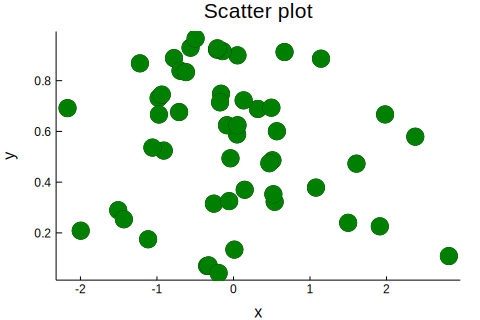

In [18]:
N = 51
x = randn(N)                         #SCATTER, HISTOGRAM
y = rand(N)

p1 = scatter(x,y,markersize=10,markercolor=:green,legend=false,grid=false)
title!("Scatter plot")
xlabel!("x")
ylabel!("y")

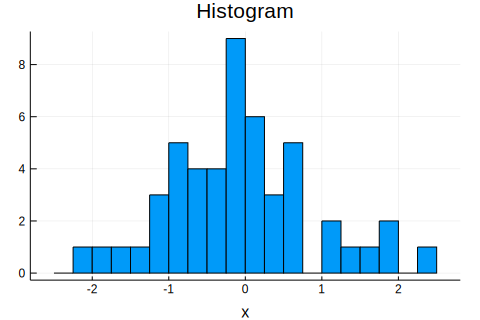

In [19]:
p1 = histogram(x,bins=-2.5:0.25:2.5,legend=false)           
title!("Histogram")
xlabel!("x")

# Time Series Plots

We can use a `Date()` vector as the x-axis variable.  

To set the (time) tick marks, we use a slightly clumsy (but simple) approach.

First define the tick marks as in this example

```xTicksLoc = Dates.value.([Date(2016,1);Date(2016,7);Date(2017,1)])```

Then, define the strings you want at those locations

```xTicksLab = ["2016";"July";"2017"]```

and then finally, add the following to the `plot()` command
```
,xticks=(xTicksLoc,xTicksLab)
```

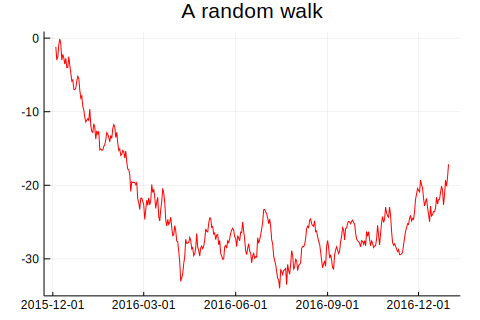

In [20]:
dN = Date(2015,12,4):Dates.Day(1):Date(2016,12,31)   #just faking some dates
y  = randn(length(dN))                               #some random numbers to plot 

p1 = plot(dN,cumsum(y),linecolor=:red,legend=false)
title!("A random walk")

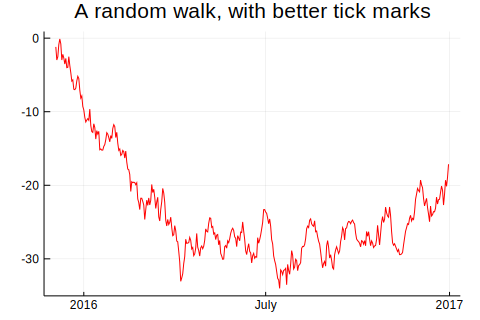

In [21]:
xTicksLoc = Dates.value.([Date(2016,1);Date(2016,7);Date(2017,1)])
xTicksLab = ["2016";"July";"2017"]  #crude way of getting the tick marks right

p1 = plot(dN,cumsum(y),linecolor=:red,legend=false,xticks=(xTicksLoc,xTicksLab))
title!("A random walk, with better tick marks")